<a href="https://colab.research.google.com/github/Tharunvikas55/ML/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [15]:
iris=datasets.load_iris()

In [16]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [17]:
X=StandardScaler().fit_transform(iris.data)

In [18]:
#create a PCA that will retain 99% of variance
pca=PCA(n_components=0.95,whiten=True)  #n_components=0.95 can be changable ,whiten is for scaling

In [19]:
X_pca=pca.fit_transform(X)

In [20]:
print("Original features",X.shape[1])
print("Reduced features",X_pca.shape[1])

Original features 4
Reduced features 2


In [21]:
X[0:5] #4 features in original

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [22]:
X_pca[0:5] #2 features in reduced

array([[-1.32123186,  0.50041748],
       [-1.21403663, -0.70276984],
       [-1.37929566, -0.35643181],
       [-1.34146506, -0.62277102],
       [-1.39423839,  0.67431207]])

(-0.0455830817980441,
 1.141297509149081,
 -0.014895066196102034,
 0.3155191169807142)

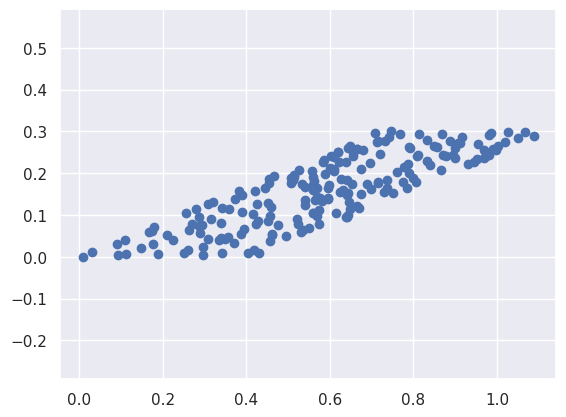

In [24]:
rng=np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.rand(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis("equal")